<a href="https://colab.research.google.com/github/NatalijaGajic/pppo_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from IPython.display import clear_output
def clear():
  for i in range(10):
    clear_output(wait=True)
    print()

## Sadržaj

1. Uvod
2. Terminologija
3. Opis podataka
4. Treniranje modela
5. Zaključak



###**Uvod**

Klasifikacija fotografija predstavlja nadgledani zadatak mašinskog učenja dodeljivanja (najverovatnije) oznake ulaznoj fotografiji iz fiksnog skupa oznaka (kategorija). 

Klasifikacija fotografija se odnosi na postupak dodeljivanja oznake (odnosno klasifikovanja) fotografiji na osnovu njenog vizuelnog sadržaja.
-vrste klasifikacije

###**Terminologija**: 

*Taksonomija* - nauka koja proučava principe, metode i svrhe klasifikacije. U biologiji se odnosi na uređenu i hijerarhijsku klasifikaciju živih bića.

Margina - granična površina lista listova. Margine mogu biti glatke, zglobljene (nazubljene), lobanje ili razdvojene.

Vene - vaskularni tkivni paketi koji podržavaju list i transportne hranljive materije.

Zadatak je klasifikacija biljke na osnovu njenog lista. 
Prethodna istraživanja dovela su do razvoja različitih metoda analize listova.  Botaničari koriste različite karakteristike listova u morfološkim i taksonomskim istraživanjima. 
Generalno se smatra da je najkorisnije karakteristike za prepoznavanje biljaka dvodimenzionalni oblik obrisa njihovih listova ili latica, kao i mreža vena lista i karakteristike margina lista. Automatski sistemi za klasifikaciju biljaka samim tim koriste tehnike obrade slike koje se baziraju na ovim karakteristikama. 
Istraživači u ovoj oblasti smatraju da obris oblika lista najefektivnije omogućava prepoznavanje biljke, budući da većina biljaka ima karakterističan oblik lista. [5]



###**Opis podataka**

Preuzimanje dataset-a i csv fajlova:

In [5]:
#https://drive.google.com/file/d/1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f/view?usp=sharing
#https://drive.google.com/file/d/1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh/view?usp=sharing
#https://drive.google.com/file/d/1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI/view?usp=sharing
!gdown --id "1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f"
!gdown --id "1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh"
!gdown --id "1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI"
!unzip images.zip

Downloading...
From: https://drive.google.com/uc?id=1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f
To: /content/images.zip
35.4MB [00:01, 25.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh
To: /content/test.csv
100% 932k/932k [00:00<00:00, 62.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI
To: /content/train.csv
100% 1.57M/1.57M [00:00<00:00, 97.6MB/s]
Archive:  images.zip
   creating: images/
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg     

In [6]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv', index_col=False)
df_test = pd.read_csv('/content/test.csv', index_col=False)
print(df_test.head())
print(df_test.describe())

   id   margin1   margin2   margin3  ...  texture61  texture62  texture63  texture64
0   4  0.019531  0.009766  0.078125  ...        0.0   0.000000   0.003906   0.053711
1   7  0.007812  0.005859  0.064453  ...        0.0   0.000977   0.037109   0.044922
2   9  0.000000  0.000000  0.001953  ...        0.0   0.015625   0.000000   0.000000
3  12  0.000000  0.000000  0.009766  ...        0.0   0.089844   0.000000   0.008789
4  13  0.001953  0.000000  0.015625  ...        0.0   0.007812   0.009766   0.007812

[5 rows x 193 columns]
                id     margin1     margin2  ...   texture62   texture63   texture64
count   594.000000  594.000000  594.000000  ...  594.000000  594.000000  594.000000
mean    780.673401    0.017562    0.028425  ...    0.019975    0.009389    0.020970
std     465.646977    0.019585    0.038351  ...    0.034704    0.013457    0.023407
min       4.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     368.500000    0.001953    0.001953  ..

In [7]:
print(df_train["species"].value_counts())
print(df_train.isnull().sum())

Acer_Circinatum            10
Quercus_Suber              10
Quercus_Ellipsoidalis      10
Cornus_Macrophylla         10
Quercus_Canariensis        10
                           ..
Lithocarpus_Edulis         10
Acer_Capillipes            10
Prunus_Avium               10
Liquidambar_Styraciflua    10
Phildelphus                10
Name: species, Length: 99, dtype: int64
id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


U dataset-u ne postoje nedostajuće vrednosti, ni disbalans klasa koji bi uticao na procenu tačnosti modela.

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder=LabelEncoder()
le=encoder.fit(df_train.species)
labels=le.transform(df_train.species)
labels_copy = labels.copy()
classes=list(le.classes_)
print(classes)
uniquelables=np.unique(labels)
print(uniquelables)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [9]:
df_train=df_train.drop(['id','species'],axis=1)
test_id=df_test.id
df_test=df_test.drop(['id'],axis=1)
print(df_train.info())
print(df_test.info())
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB
None


###**Treniranje modela**

####Metodologija testiranja

Algoritmi klasifikacije se treniraju korišćenjem
primera iz trening skupa, a zatim se performanse klasifikatora mere nad slikama iz test
skupa koje nisu korišćene prilikom treniranja klasifikatora.
Za određivanje performanse upotrebljenog modela, koristi se trening skup podataka, nad kojim se primenjuje tehnika pod nazivom unakrsna validacija
(engl. cross validation). Ova tehnika podrazumeva da se trening skup podataka podeli na 𝑘
delova približno iste veličine, a zatim se 𝑘 − 1 delova koristi kao skup za učenje a
preostali deo kao skup za validaciju. Postupak se ponavlja 𝑘 puta tako da svaki od delova po
jednom učestvuje u ulozi validacionog skupa. 

Zbog velikog broja klasa, a malog broja primeraka u okviru svake od klasa, kako bi se obezbedila distribucija klasa prilikom postupka unakrsne validacije približna onoj u trening setu podataka, potrebno je izvršiti stratifikaciju. 
Postupak podele na 𝑘 delova
potrebno je modifikovati tako da se osigura podjednaka zastupljenost klasa u svakom od 𝑘 delova. Ovakav
postupak se naziva stratifikacija i njime bi trebalo obezbediti da zastupljenost klasa bude
približno jednaka zastupljenosti u inicijalnom skupu primera. U praksi se najčešće uzima 𝑘 =
5 ili 𝑘 = 10. Zbog male veličine dataseta-a za parametar 𝑘 izabrana je vrednost 5.



In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4)
df_labels = pd.DataFrame(labels)
splits = skf.split(df_train, df_labels)
for n,(train_index, test_index) in enumerate(splits):
  X_train, X_test = df_train.iloc[train_index,:], df_train.iloc[test_index,:]
  y_train, y_test = df_labels.iloc[train_index,:], df_labels.iloc[test_index,:]
  print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{df_train.iloc[test_index,5].value_counts() / len(df_train.iloc[test_index,5])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{df_train.iloc[train_index,5].value_counts() / len(df_train.iloc[train_index,5])}\n\n')
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
0.000000    0.242424
0.013672    0.045455
0.001953    0.045455
0.003906    0.045455
0.005859    0.035354
              ...   
0.082031    0.005051
0.171880    0.005051
0.128910    0.005051
0.130860    0.005051
0.105470    0.005051
Name: margin6, Length: 61, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
0.000000    0.272727
0.003906    0.045455
0.001953    0.035354
0.007812    0.035354
0.005859    0.032828
              ...   
0.275390    0.001263
0.181640    0.001263
0.115230    0.001263
0.111330    0.001263
0.234380    0.001263
Name: margin6, Length: 103, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
0.000000    0.262626
0.003906    0.045455
0.009766    0.035354
0.011719    0.035354
0.017578    0.035354
              ...   
0.158200    0.005051
0.074219    0.005051
0.193360    0.005051
0.207030    0.005051
0.175780    0.00

Podela dataseta-a na podatke za trening i podatke za testiranje.

In [11]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test=train_test_split(df_train,labels,test_size=0.20,shuffle=True,stratify=labels, random_state=42)


Izvršeno je skaliranje feature-a podataka. Skaliranje podataka prestavlja standardizaciju podataka, odnosno postupak kojim se podaci normalizuju u određenom opsegu. Ovaj postupak može ubrzati učenje u slučaju primene algoritma stohastičkog gradijentnog supsta, a neophodan je korak u algoritmima koje računaju distancu između tačaka dataset-a. Prilikom računanja distance, feature-i većeg opsega će imati veći uticaj na kalkulaciju distance, iako razlika u vrednostima drugog feature-a manjeg opsega može biti značajnija u okviru posmatranog opsega. 

Određeni algoritmi (Naive Bayes, Linear Discriminant Analysis) su dizajnirani da reše problem različitih opsega dajući težine karakteristikama u skladu sa njihovim opsegom.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[-0.59374116, -0.49215016, -0.46635087, ..., -0.50828104,
         0.80310076, -0.67612379],
       [-0.79764384, -0.69710026, -0.31715264, ..., -0.21060727,
        -0.21406781, -0.80486295],
       [-0.89959518, -0.59463833, -0.31715264, ...,  1.91906745,
        -0.55305456, -0.80486295],
       ...,
       [ 1.03758464,  0.73747174, -0.46635087, ..., -0.37089856,
         0.19282739, -0.67612379],
       [ 0.52782795,  0.4300597 , -0.31715264, ...,  0.10997531,
        -0.01062021, -0.80486295],
       [-0.79764384, -0.64586929, -0.39177085, ..., -0.48537223,
        -0.62089357,  0.13910704]])

###Klasifikacija

Istrenirana su četiri modela:

*   SGD Classifier (Stochastic Gradient Descent)
*   Random Forest Classifier
*   KNeighbors Classifier
*   SVM (Support Vector Machine)
*   Naive Bayes

Kao standardna mera uspešnosti klasifikacije, korišćena je tačnost klasifikacije (engl.
classification accuracy). Tačnost klasifikacije se definiše kao broj tačno klasifikovanih slika u
odnosu na ukupan broj slika u test skupu, izražen u procentima:
𝐴𝐶𝐶 =
𝑏𝑟𝑜𝑗 𝑡𝑎č𝑛𝑜 𝑘𝑙𝑎𝑠𝑖𝑓𝑖𝑘𝑜𝑣𝑎𝑛𝑖ℎ 𝑠𝑙𝑖𝑘𝑎/𝑢𝑘𝑢𝑝𝑎𝑛 𝑏𝑟𝑜𝑗 𝑠𝑙𝑖𝑘𝑎 𝑡𝑒𝑠𝑡 𝑠𝑘𝑢𝑝𝑎 × 100%





In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

def train_model(classifier, X_train, X_test, y_train, y_test):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print(accuracy)
  #print(cm)
  #print(classification_report(y_test, grid_predictions))
  return accuracy

####SGD Classifier


In [14]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()
sgd_acc = train_model(classifier, X_train, X_test, y_train, y_test)

0.6060606060606061


####Random Forest Classifier



In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
rndf_acc = train_model(classifier, X_train, X_test, y_train, y_test)


0.9747474747474747


#### KNeighbours Classificator

In [16]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier()
knn_acc = train_model(classifier, X_train, X_test, y_train, y_test)

0.8434343434343434


####SVM



In [17]:
from sklearn import svm

classifier = svm.SVC(gamma=0.001, C=100.)
svm_acc = train_model(classifier, X_train, X_test, y_train, y_test)

0.8080808080808081


#### Grid Search 



In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf', 'poly', 'sigmoid']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, np.ravel(y_train))
# clear()
# # print best parameter after tuning
# print(grid.best_params_)
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [19]:
#{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}
classifier = svm.SVC(gamma=1, C=1000., kernel='sigmoid')
svm_grid_acc = train_model(classifier, X_train, X_test, y_train, y_test)


0.9242424242424242


In [20]:
models = pd.DataFrame({
    'Model': ['SGD Classifier','Random Forest Classifier','K Neighbors Classifier', 
              'SVM Classifier', 'SVM Paramater Tunning'],

    'Score': [sgd_acc,
              rndf_acc,
              knn_acc, 
              svm_acc,
              svm_grid_acc]})
models.sort_values(by='Score', ascending=True)

,Model,Score
0,SGD Classifier,0.606061
3,SVM Classifier,0.808081
2,K Neighbors Classifier,0.843434
4,SVM Paramater Tunning,0.924242
1,Random Forest Classifier,0.974747


###Feature Extraction 

Tehnike redukcije dimenzionalnosti koriste se kako bi se klasifikacioni model trenirao na manjem broju feature-a i tako se poboljšala performantnost. Pored toga, ove tehnike mogu dovesti i do unapređenja tačnosti modela, rešavajući se redundantnih karakteristika dok zadržavaju karakteristike velike varijanse za koje postoji veća verovatnoća da će dati dobru podelu između klasa. 

Biće razmotrene dve metode:


*   Principle Component Analysis (PCA)
*   Linear Discriminant Analysis (LDA)



####PCA



In [21]:
from sklearn.decomposition import PCA

print(X_train.shape)
for num in range(64,192,8):
  pca = PCA(n_components=num)
  pca.fit_transform(X_train)
  cum_sum = pca.explained_variance_ratio_.cumsum()
  if(cum_sum[num-1] > 0.99):
    break

#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
pca = PCA(n_components=num)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


(792, 192)
[0.14650407 0.24868703 0.33632563 0.40343806 0.45838309 0.50487226
 0.5470897  0.58657003 0.62023523 0.6504403  0.67648982 0.69972468
 0.71843508 0.73648207 0.75326022 0.7686994  0.78334376 0.79751121
 0.81071267 0.82182018 0.83156566 0.84040677 0.8491543  0.85714115
 0.86448603 0.87131694 0.87797342 0.88423803 0.88992526 0.89535863
 0.90044763 0.90500979 0.9093306  0.91348874 0.91715448 0.92074469
 0.92421926 0.92735418 0.93041134 0.93326334 0.93599229 0.9385068
 0.94092854 0.94326676 0.94546869 0.94760393 0.94961764 0.95155276
 0.95332519 0.95504363 0.95674089 0.95834177 0.95991153 0.96143545
 0.96290976 0.96432877 0.96571443 0.96700927 0.96825832 0.96943804
 0.97059507 0.97171647 0.97279938 0.97383198 0.97485511 0.97585207
 0.9768287  0.9777316  0.97859933 0.97943661 0.98025929 0.98107001
 0.98184392 0.9825912  0.98330967 0.98401443 0.984697   0.98535069
 0.98596896 0.98657814 0.98716828 0.98774604 0.98830247 0.98885076
 0.98938559 0.98990343 0.99039968 0.99088939]


In [22]:
#SVM
classifier = svm.SVC(gamma=1, C=1000., kernel='sigmoid')
svm_acc_pca = train_model(classifier, X_train_pca, X_test_pca, y_train, y_test)

#Random Forest
classifier = RandomForestClassifier()
rndf_acc_pca = train_model(classifier, X_train_pca, X_test_pca, y_train, y_test)

0.9292929292929293
0.8888888888888888


In [23]:
models = pd.DataFrame({
    'Model': ['SGD Classifier','Random Forest Classifier','K Neighbors Classifier', 
              'SVM Classifier', 'SVM Parameter Tunning', 'SVM Parameter Tunning PCA', 'Random Forest PCA'],

    'Score': [sgd_acc,
              rndf_acc,
              knn_acc, 
              svm_acc,
              svm_grid_acc,
              svm_acc_pca,
              rndf_acc_pca]})
models.sort_values(by='Score', ascending=True)

,Model,Score
0,SGD Classifier,0.606061
3,SVM Classifier,0.808081
2,K Neighbors Classifier,0.843434
6,Random Forest PCA,0.888889
4,SVM Parameter Tunning,0.924242
5,SVM Parameter Tunning PCA,0.929293
1,Random Forest Classifier,0.974747


In [25]:
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_train)
print(chi_square_value) 
print(p_value)
kmo_all,kmo_model = calculate_kmo(X_train)
print(kmo_model)
#OUTPUT: 0.26456705326205554

     |████████████████████████████████| 40kB 3.2MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40398 sha256=2b0795291c48f12d947b5161db462873947c7ceb71a94579b9f4a4b1a704b31e
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer
362290.02332241274
0.0
0.26456705326205554


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


####LDA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

for num in range(64,192,8):
  lda = LDA(n_components=num)
  lda.fit_transform(X_train, y_train)
  cum_sum = pca.explained_variance_ratio_.cumsum()
  if(cum_sum[num-1] > 0.99):
    break

print(lda.explained_variance_ratio_.cumsum())
lda = LDA(n_components=num)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

[0.15072724 0.22678995 0.2980822  0.35296564 0.39972437 0.44277982
 0.47848343 0.51193198 0.5399595  0.56588651 0.58997984 0.61246683
 0.63445129 0.654616   0.67174782 0.68803432 0.70343977 0.7185004
 0.73332089 0.7471607  0.76022422 0.77298955 0.78423004 0.79538469
 0.80558798 0.81536763 0.824561   0.83342458 0.8419608  0.84993994
 0.85740739 0.86479251 0.87166506 0.87824939 0.88458134 0.89055407
 0.89626098 0.90184589 0.90716975 0.91187812 0.9164365  0.92078522
 0.92497722 0.92880121 0.93255012 0.93619235 0.93957586 0.94277854
 0.94586713 0.94883547 0.9516783  0.95433513 0.95684867 0.95931556
 0.96165196 0.96385999 0.96598722 0.96789454 0.96978392 0.97166599
 0.97332358 0.97493624 0.97644925 0.97792028 0.979336   0.9807217
 0.98201638 0.98323808 0.98439297 0.98551301 0.98655808 0.98758172
 0.98853221 0.98939723 0.99025176 0.99103948 0.99179389 0.99249837
 0.99319313 0.99383912 0.99442822 0.99496539 0.99548497 0.99596903
 0.99643657 0.99686499 0.99726374 0.99764267]


In [27]:
#SVM
classifier = svm.SVC(gamma=1, C=1000., kernel='sigmoid')
svm_acc_lda = train_model(classifier, X_train_lda, X_test_lda, y_train, y_test)

#Random Forest
classifier = RandomForestClassifier()
rndf_acc_lda = train_model(classifier, X_train_lda, X_test_lda, y_train, y_test)

0.030303030303030304
0.9646464646464646


In [28]:
models = pd.DataFrame({
    'Model': ['SGD Classifier','Random Forest Classifier','K Neighbors Classifier', 
              'SVM Classifier', 'SVM Parameter Tunning', 'SVM Parameter Tunning PCA', 'Random Forest PCA',
              'SVM Parameter Tunning LDA', 'Random Forest LDA'],

    'Score': [sgd_acc,
              rndf_acc,
              knn_acc, 
              svm_acc,
              svm_grid_acc,
              svm_acc_pca,
              rndf_acc_pca,
              svm_acc_lda,
              rndf_acc_lda]})
models.sort_values(by='Score', ascending=True)

,Model,Score
7,SVM Parameter Tunning LDA,0.030303
0,SGD Classifier,0.606061
3,SVM Classifier,0.808081
2,K Neighbors Classifier,0.843434
6,Random Forest PCA,0.888889
4,SVM Parameter Tunning,0.924242
5,SVM Parameter Tunning PCA,0.929293
8,Random Forest LDA,0.964646
1,Random Forest Classifier,0.974747


###Naive Bayes

In [230]:
from sklearn.naive_bayes import GaussianNB

def stratified_k_fold(classifier, df_train):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4)
  df_labels = pd.DataFrame(labels)
  splits = skf.split(df_train, df_labels)
  scores = np.array([])
  for n,(train_index, test_index) in enumerate(splits):
    X_train, X_test = df_train.iloc[train_index,:], df_train.iloc[test_index,:]
    y_train, y_test = df_labels.iloc[train_index,:], df_labels.iloc[test_index,:]
    scores = np.append(scores, np.array([classifier.fit(X_train, y_train).score(X_test, y_test).mean()]), axis=None)
    # print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
    #         f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
    #         f'{df_train.iloc[test_index,5].value_counts() / len(df_train.iloc[test_index,5])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
    #         f'{df_train.iloc[train_index,5].value_counts() / len(df_train.iloc[train_index,5])}\n\n')
  return scores

classifier = GaussianNB()
scores = stratified_k_fold(classifier, df_train)
print(scores)

[0.59090909 0.59090909 0.46969697 0.55555556 0.55555556]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [231]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
df_train_pca=pca.fit_transform(df_train)
print("Number of descriptors before PCA: " + '{:1.0f}'.format(df_train.shape[1]))
print("Number of descriptors after PCA: " + '{:1.0f}'.format(df_train_pca.shape[1]))

Number of descriptors before PCA: 192
Number of descriptors after PCA: 191


In [233]:
classifier = GaussianNB()
scores = stratified_k_fold(classifier, pd.DataFrame(df_train_pca))
print(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[0.94444444 0.94949495 0.96969697 0.98989899 0.93939394]


###Deep learning 

In [49]:
#Neural Network Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

print(df_train_copy.shape)
print(df_test_copy.shape)
print(labels_copy.shape)

(990, 192)
(594, 192)
(990, 1)


Skaliranje podataka

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(df_train_copy)

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

One Hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_copy = labels.copy()
labels_copy = pd.DataFrame(labels_copy)
labels_one_hot = ohe.fit_transform(labels_copy.values.reshape(-1, 1)).toarray()
print(labels_one_hot.shape)
print(labels_one_hot[0])

(990, 99)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


Stratifikovana podela na podatke za treniranje i validaciju.

In [65]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
train_index, test_index = next(iter(sss.split(df_train_copy, labels_one_hot)))
X_train_nn, X_test_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[test_index,:]
y_train_nn, y_test_nn = labels_one_hot[train_index], labels_one_hot[test_index]

# Ponovna stratifikovana podela nije izvodljiva 
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
# train_index, val_index = next(iter(sss.split(X_train_nn, y_train_nn)))
# X_train_nn, X_val_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[val_index,:]
# y_train_nn, y_val_nn = labels_one_hot[train_index], labels_one_hot[val_index]
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.10, random_state=42)
print("x_train dim: ",X_train_nn.shape)
print("x_test dim:   ",X_test_nn.shape)
print("x_val dim:   ",X_val_nn.shape)
print()

x_train dim:  (801, 192)
x_test dim:    (99, 192)
x_val dim:    (90, 192)



In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

model = Sequential()
model.add(Dense(256, input_dim=192, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1600, activation='relu'))
model.add(Dense(99, activation='softmax'))

In [206]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=600)
checkpointer=ModelCheckpoint(filepath='nn_no_regularization.hdf5',verbose=1,save_best_only=True)
history = model.fit(X_train_nn, y_train_nn, epochs=100,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[early_stopping])

Epoch 1/100
26/26 [==============================] - 2s 55ms/step - loss: 13.1506 - accuracy: 0.2159 - val_loss: 5.6928 - val_accuracy: 0.0111
Epoch 2/100
26/26 [==============================] - 1s 37ms/step - loss: 4.0599 - accuracy: 0.0769 - val_loss: 3.3140 - val_accuracy: 0.1667
Epoch 3/100
26/26 [==============================] - 1s 36ms/step - loss: 2.7703 - accuracy: 0.2371 - val_loss: 3.8313 - val_accuracy: 0.1222
Epoch 4/100
26/26 [==============================] - 1s 36ms/step - loss: 2.9054 - accuracy: 0.2472 - val_loss: 2.0937 - val_accuracy: 0.3778
Epoch 5/100
26/26 [==============================] - 1s 37ms/step - loss: 2.1001 - accuracy: 0.3512 - val_loss: 2.6184 - val_accuracy: 0.2667
Epoch 6/100
26/26 [==============================] - 1s 36ms/step - loss: 2.6526 - accuracy: 0.3273 - val_loss: 2.3433 - val_accuracy: 0.3333
Epoch 7/100
26/26 [==============================] - 1s 37ms/step - loss: 1.9397 - accuracy: 0.3846 - val_loss: 2.0310 - val_accuracy: 0.4444
Epoch

In [109]:
def print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model):
  score=model.evaluate(X_train_nn,y_train_nn,verbose=1)              
  accuracy=100*score[1]                                       
  print('Test accuracy on train data is %.4f%%' % accuracy)

  score=model.evaluate(X_test_nn,y_test_nn,verbose=1)               
  accuracy=100*score[1]                                       
  print('Test accuracy on test data is %.4f%%' % accuracy)

In [110]:
import matplotlib.pyplot as plt
def print_and_plot_history(history):
  print('val_acc: ',max(history.history['val_accuracy']))
  print('val_loss: ',min(history.history['val_loss']))
  print('train_acc: ',max(history.history['accuracy']))
  print('train_loss: ',min(history.history['loss']))
  print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

  plt.semilogy(history.history['loss'])
  plt.semilogy(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


26/26 [==============================] - 0s 8ms/step - loss: 1.1052e-05 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 7ms/step - loss: 1.0810 - accuracy: 0.8889
Test accuracy on test data is 88.8889%
val_acc:  0.8888888955116272
val_loss:  0.5554815530776978
train_acc:  1.0
train_loss:  1.1702296433213633e-05
train/val loss ratio:  2.106693979012617e-05


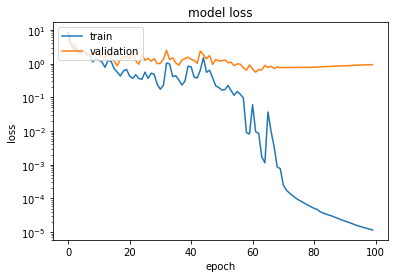

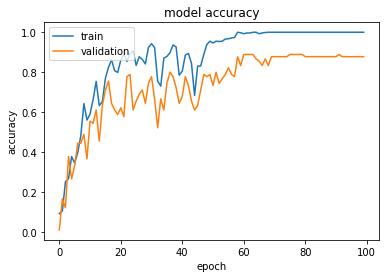

In [111]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model)
print_and_plot_history(history)

Vrednosti funkcije gubitka i metrika tačnosti fluktuiraju. Pretpostavka je da se ovo dešava iz sledećih ili nekog od sledećih razloga: 

*   Model je previše veliki - zbog ovoga je teško naći lokalne minimume podešavanjem velikog broja parametara trenirajući nad malom količinom podataka.
*   Premala vrednost parametra treniranja batch_size - može se desiti da pogrešno labelirani podaci dovedu do ažuriranja parametara modela tako da se udaljava od lokalnog minimuma, ovaj efekat je izražen u slučajevima ažuriranja parametara modela na malom delu podataka (batch_size ima premalu vrednost). Takođe, u dataset-u postoji 99 klasa, pa bi mali batch_size onemogućio da se u skupu podataka na osnovu kojih se podešavaju parametri modela nađe veći broj klasa.

U nastavku model je uprošćen i default-na vrednost batch_size-a 32 je promenjena na 192.

Takođe, činjenica da se train loss umanjuje, dok vrednost validation loss-a stagnira, ukazuje na to da naučeni parametri ne obezbeđuju dovoljno dobru generalizaciju i predikciju klasa za podatke na kojima model nije treniran. Ova pojava predstavlja overfitting, koji je u ovom slučaju moguć zbog obučavanja modela nad malim skupom podataka. 

Overfitting se može rešiti tako što se trenira više modela različite arhitekture, a zatim za krajnji rezultat predikcije uzima prosek ili klasa koja je predviđena najviše puta. Dropout predstavlja mehanizam regularizacije koji aproksimira treniranje modela u paraleli. Iz tog razloga, kako bi se rešio problem overfitting-a dodat je Dropout sloj. 

Dropout sloj obezbeđuje da se prilikom treniranja, sa određenom verovatnoćom, određeni izlazi sloja ignorišu, čime se postiže efekat šuma.



In [209]:
from keras.layers import Dropout

new_model = Sequential()
new_model.add(Dense(256, input_dim=192, activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(600, activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(99, activation='softmax'))


In [210]:
opt = keras.optimizers.Adam(learning_rate=0.01)
new_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [211]:
early_stopping = EarlyStopping(monitor='val_loss', patience=600)
checkpointer=ModelCheckpoint(filepath='nn_no_regularization.hdf5',verbose=1,save_best_only=True)
new_history = new_model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 1s 131ms/step - loss: 4.5948 - accuracy: 0.0166 - val_loss: 4.3902 - val_accuracy: 0.0778
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 4.1577 - accuracy: 0.0784 - val_loss: 3.5552 - val_accuracy: 0.0889
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 3.1604 - accuracy: 0.1594 - val_loss: 2.4454 - val_accuracy: 0.2667
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 2.3626 - accuracy: 0.2952 - val_loss: 1.8259 - val_accuracy: 0.4556
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 1.6999 - accuracy: 0.4744 - val_loss: 1.7632 - val_accuracy: 0.4556
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 1.4007 - accuracy: 0.5598 - val_loss: 1.3868 - val_accuracy: 0.5556
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 1.1270 - accuracy: 0.6357 - val_loss: 1.3037 - val_accuracy: 0.5778
Epoch 8/100
5/5 [==

26/26 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9938
Test accuracy on train data is 99.3758%
4/4 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.9091
Test accuracy on test data is 90.9091%
val_acc:  0.9333333373069763
val_loss:  0.2698836922645569
train_acc:  0.9975031018257141
train_loss:  0.008868610486388206
train/val loss ratio:  0.032860860958188756


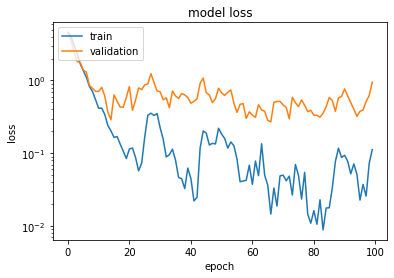

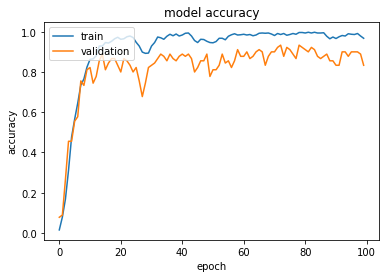

In [212]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, new_model)
print_and_plot_history(new_history)

Uprošćavanje modela, dropout slojevi i povećan batch_size poboljšali su tačnost modela. Međutim, i dalje se javalja fluktuacija u vrednostima funkcije gubitka, pogotovo u kasnijim epohama. Ovo se može objasniti time da je stopa učenja prevelika, pa se parametri ažuriraju prevelikim vrednostima i pa performansa modela oscilira kroz epohe.

Iz ovog razloga, definisano je propadanje stope učenja (eng. decay rate). Learning rate se za jedan korak računa po formuli:

*initial_learning_rate* x *decay_rate* ^ (*step* / *decay_steps*) 

In [213]:
from keras.callbacks import LearningRateScheduler 

def lr_scheduler(epoch, lr):
    if epoch > 50:
        lr = 0.001
        return lr
    return lr
scheduler = [LearningRateScheduler(lr_scheduler)]

new_history2 = new_model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[early_stopping, scheduler])


Epoch 1/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0858 - accuracy: 0.9763 - val_loss: 0.8042 - val_accuracy: 0.8444
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1283 - accuracy: 0.9600 - val_loss: 0.7401 - val_accuracy: 0.8222
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 0.1033 - accuracy: 0.9663 - val_loss: 0.5007 - val_accuracy: 0.8667
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 0.6842 - val_accuracy: 0.8444
Epoch 5/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0649 - accuracy: 0.9750 - val_loss: 0.8129 - val_accuracy: 0.8333
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.8923 - val_accuracy: 0.8222
Epoch 7/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0333 - accuracy: 0.9913 - val_loss: 0.5647 - val_accuracy: 0.8889
Epoch 8/100
5/5 [===

26/26 [==============================] - 0s 3ms/step - loss: 4.0699e-05 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.9596
Test accuracy on test data is 95.9596%
val_acc:  0.9333333373069763
val_loss:  0.2698836922645569
train_acc:  0.9975031018257141
train_loss:  0.008868610486388206
train/val loss ratio:  0.032860860958188756


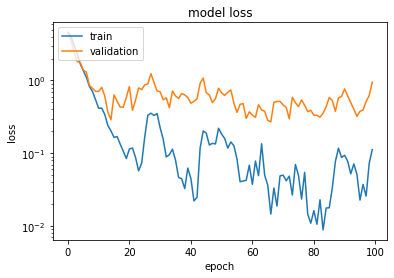

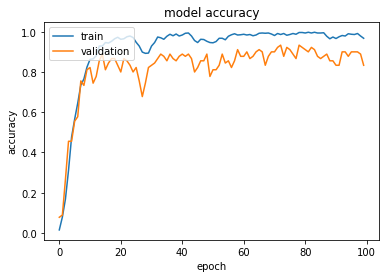

In [214]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, new_model)
print_and_plot_history(new_history)